# <span style="color:green"> Laboratorio di Simulazione Numerica (NSL) </span>
## <span style="color:blue">  Esercitazione 10 </span>

### Esercizio 10.1: Il Problema del Commesso Viaggiatore(TSP) - Simulated Annealing 

### Obiettivo

L'**obiettivo** di questa prima parte dell'esercitazione è di risolvere il problema di ottimizzazione combinatoria del commesso viaggiatore, questa volta, utilizzando un  nuovo algoritmo con componenti di natura stocastica : il **Simulated Annealing (SA)**.

Sfruttando, in gran parte, il codice C++ già scritto per la precedente esercitazione, esso verrà modificato ed adattato per soddisfare le nuove richieste e per trovare la soluzione agli stessi sistemi già trattati con l'algoritmo genetico:

**1)** $N_{city} = 32$ città disposte casualmente su una **circonferenza** di raggio $r=1$.

**2)** $N_{city} = 32$ città disposte casualmente all'interno di un **quadrato** di lato $l=2$.

Anche la modalità di presentazione dei risultati ottenuti saranno le medesime:

- Un'immagine che ritragga il **migliore percorso in assoluto** trovato dall'algoritmo.


- Un grafico che riporti l'andamento della funzione costo $L^{(1)}$ del migliore percorso.

con la possibilità, infine,  di eseguire un confronto fra gli esiti ottenuti applicando i due differenti algoritmi.


### Simulated Annealing (SA) e codice C++


Il metodo di ottimizzazione *stocastica* del SA pone le sue fondamenta in un **analogia** con un sistema termodinamico dove, nello specifico, un liquido viene *raffreddato* in modo sufficientemente **lento** al punto tale che alla fine del processo i gradi di libertà del sistema, che progressivamente perdono la loro mobilità termica, si dispongano secondo una struttura cristallina che identifica uno stato di minima energia potenziale per il sistema.  L'essenza di questo procedimento è che il raffreddamento avvenga lenetamente lasciando tempo ai gradi di libertà di redistribuirsi all'abbassarsi della temperatura.

Ora il punto di svolta sta nel fatto che ogni problema di ottimizzazione può essere interpretato come un problema di annealing nel contesto della **meccanica statistica**. Identificando la funzione costo del problema di ottimizzazione come la funzione energia di un sistema in meccanica statistica caratterizzato dalla funzione di distribuzione di probabilità data dal peso di Boltzmann $p(x) = \frac{e^{-\beta L^{(1)}(x)}}{Z}$, con i metodi MC e l'algoritmo di Metropolis è possibile campionare quest'ultima al variare del parametro $\beta$ che rappresenta una temperatura inversa **fittizia**. Nel limite di temperature basse ($\lim_{ \beta \to \infty }$), ossia raffredando il sistema, la densità di probabilità si concentrerà sui minimi della funzione costo $L^{(1)}$, la condizione necessaria per risolvere il problema di ottimizzazione.

Quindi, di solito si prepara una **annealing schedule** che consiste nel programmare una tabella riportante il numero di passi MC $N_i$  che il sistema dovrà passare ad una certa temperatura inversa $\beta_{i}$ (blocco MC a fissata temperatura).

Partendo da una configurazione iniziale $\vec{x}_0$, abbassando lentamente la temperatura dopo ogni blocco, la simulazione del sistema consisterà nell'eseguire gli steps MC prefissati nello schedule per ogni valore di $T_i$ producendo e simulando una catena di Markov-discreta campionando nuove configurazioni secondo la distribuzione del peso di Boltzmann data per l'attuale valore del parametro $\beta_{i}$ e accettando la mossa proposta  con una classica probabilità di accettazione del Metropolis:

$$
A (\vec{x_{new}}, \vec{x_{old}}) = \begin{cases} e^{-\beta (L^{(1)}(\vec{x_{new}})-L^{(1)}(\vec{x_{old}})}) & \mbox{se } L^{(1)}(\vec{x_{new}}) > L^{(1)}(\vec{x_{old}}) \\ 1 & \mbox{altrimenti}
\end{cases}
$$

dove $\vec{x_{new}}$, $\vec{x_{old}}$ sono la vecchia configurazine campionata e la nuova proposta e $L^{(1)}(\vec{x_{new}})$, $L^{(1)}(\vec{x_{new}})$ i relativi valori di energia (o della funzione costo) associati.    


Dal codice C++ scritto nella scorsa esercitazione è statta rimossa la classe *Population* dato che il **SA** lavora su una singola soluzione candidata, il cosidetto individuo, ottimizzandola (non è un metodo parallelamente intrinseco). Inoltre è stato tolto l'operatore del crossover non dovendo più simulare la riproduzione tra i genitori. Per il resto le classi *City* e *Individual* non sono state modificate e possiedono gli stessi metodi.


**N.B.**: il programma usa unità con $k_B = 1$. 


Il simulated annealing per la risoluzione del TSP funziona in questo modo:


- Il programma inizializza e prepara il sistema, mediante la routine *Input()*, leggendo dal file *input.dat*  (dove vengono sovrascritti i file *input.circle(square)* con gli opportuni comandi del makefile) tutti i parametri necessari per eseguire la simulazione: il numero di città da visitare $N_{city} = 32$; le coordinate sul piano della posizione della città di partenza e di arrivo *xstart_city* e *ystart_city*; una variabile intera *circle_or_square* che decide, settando il proprio valore a 1 o 0, se le città, rispettivamente, sono disposte sulla circonferenza oppure all'interno del quadrato; la temperatura iniziale *starting_temp_circle(square)* dalla quale parte il processo di raffreddamento ($T_{start} = 1.4$ per il cerchio, $T_{start} = 1.8$ per il quadrato) settata in modo da avere un tasso di accettazione iniziale del 50%; il numero di steps Monte Carlo, $N_{steps} = 10^4$ per ogni valore di $\beta$ "programmato". Inoltre genera casualmente le coordinate delle città costruendo il primo individuo, rimescola (*Shuffle()*) casualmente l'ordine delle città generando l'individuo di partenza (ovvero la configurazione iniziale), verifica che rispetti i vincoli (*Check()*) ed esegue una prima stampa.



- Fino a che la temperatura non scende al di sotto del valore $T_{end} = 0.001$ itera le seguenti procedure:

    - Per ogni valore di temperatura, e quindi di $\beta$ esegue un ciclo sugli $N_{steps}$ MC in cui:
    
        - Con la routine *Move_Mutation()* propone il nuovo individuo (la nuova configurazione) applicando casualmente, con una probabilità uniforme, uno dei tre operatori di mutazione genetica implementati e accetta o meno la "mossa" con il test del Metropolis valutando le relative funzioni costo.
        
        - Verifica che il nuovo individuo campionato rispetti i vincoli.
        
        -  Con la routine *PrintResults()* stampa i risulati sui file di output *Best_Individual_Evolution_(circle/square).dat* e *Best_Individual_(circle/square).dat*.
        
    - Finito il ciclo che la routine *Restart()* stampa a video le caratteristiche del blocco (temperatra,$\beta$, tasso di accetteazione) e procede con la nuova temperatura di simulazione secondo il seguente **annealing schedule**:
     
        - Per le città distribuite casualmente su una circonferenza
$$
\Delta T = \begin{cases} 0.05 & \mbox{se } T \leq 0.5 \\ 0.02 & \mbox{se } 0.2 \leq  T < 0.5  \\ 0.01 & \mbox{se } 0.01 \leq  T < 0.2  \\ 0.002 & \mbox{se } 0.001 \leq  T < 0.01 
\end{cases}
$$
     
        - Per le città distribuite casualmente al''interno di un quadrato
$$
\Delta T = \begin{cases} 0.05 & \mbox{se } T \leq 0.8 \\ 0.02 & \mbox{se } 0.2 \leq  T < 0.8  \\ 0.01 & \mbox{se } 0.01 \leq  T < 0.2 \\ 0.002 & \mbox{se } 0.001 \leq  T < 0.01 
\end{cases}
$$


I risultati sono mostrati e commentati qui di seguito.

32 cities randomly placed on a circumference
The Length of the best path:  6.24564
32 cities randomly placed inside a square
The Length of the best path:  9.37425


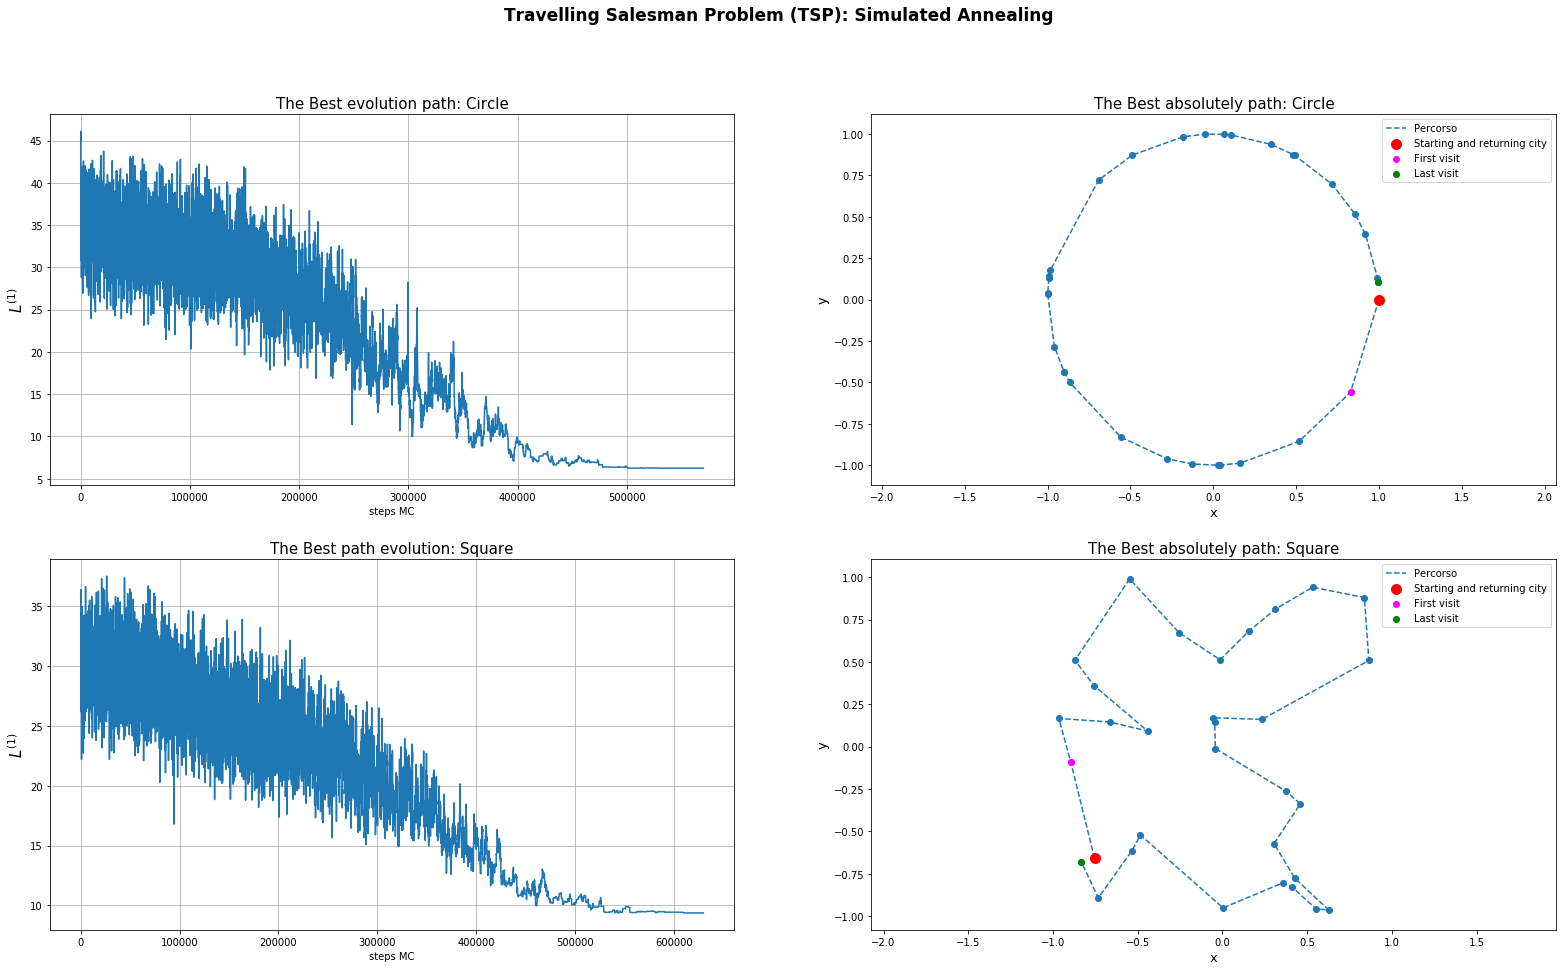

In [27]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

steps_circle, L_best_circle = np.loadtxt("Results/Individual_Evolution_circle.dat", usecols=(0,1), unpack='true')
x_best_circle,y_best_circle = np.loadtxt("Results/Best_Individual_circle.dat", usecols=(1,2), unpack='true')


fig=plt.figure(figsize=(27,15))
plt.suptitle("Travelling Salesman Problem (TSP): Simulated Annealing", fontsize='17', weight='bold')

plt.subplot(221)
plt.plot(steps_circle, L_best_circle)
plt.title("The Best evolution path: Circle", size = '15')
plt.xlabel('steps MC')
plt.ylabel('$L^{(1)}$',size = '15')
plt.grid(True)


plt.subplot(222)
plt.plot(x_best_circle,y_best_circle,zorder=1,label = 'Percorso',linestyle = '--') 
plt.scatter(x_best_circle,y_best_circle,zorder=2)
plt.scatter(x_best_circle[0],y_best_circle[0],s=100,label ='Starting and returning city',color = 'red', zorder = 2)
plt.scatter(x_best_circle[1],y_best_circle[1],label ='First visit',color = 'Magenta',zorder = 2)
plt.scatter(x_best_circle[len(x_best_circle)-1],y_best_circle[len(y_best_circle)-1],label ='Last visit',color = 'Green',zorder = 2)
plt.title('The Best absolutely path: Circle', size = '15')
plt.axis("equal")
plt.xlabel("x", fontsize = 13)
plt.ylabel("y", fontsize = 13)
plt.legend()


print ('32 cities randomly placed on a circumference')
print('The Length of the best path: ', L_best_circle[len(L_best_circle)-1])

steps_square, L_best_square = np.loadtxt("Results/Individual_Evolution_square.dat", usecols=(0,1), unpack='true')
x_best_square,y_best_square = np.loadtxt("Results/Best_Individual_square.dat", usecols=(1,2), unpack='true')

plt.subplot(223)
plt.plot(steps_square, L_best_square)
plt.title("The Best path evolution: Square", size = '15')
plt.xlabel('steps MC')
plt.ylabel('$L^{(1)}$',size = '15')
plt.grid(True)


plt.subplot(224)
plt.plot(x_best_square,y_best_square,zorder=1,label = 'Percorso',linestyle = '--') 
plt.scatter(x_best_square,y_best_square,zorder=2)
plt.scatter(x_best_square[0],y_best_square[0],s=100,label ='Starting and returning city',color = 'red', zorder = 2)
plt.scatter(x_best_square[1],y_best_square[1],label ='First visit',color = 'Magenta',zorder = 2)
plt.scatter(x_best_square[len(x_best_square)-1],y_best_square[len(y_best_square)-1],label ='Last visit',color = 'Green',zorder = 2)
plt.title('The Best absolutely path: Square', size = '15')
plt.axis("equal")
plt.xlabel("x", fontsize = 13)
plt.ylabel("y", fontsize = 13)
plt.legend()

print ('32 cities randomly placed inside a square')
print('The Length of the best path: ', L_best_square[len(L_best_square)-1])


plt.show()

- Si osserva che l'algoritmo SA funziona in modo soddisfacente anche se, confrontando i risultati con quelli ottenuti con l'algoritmo genetico, nel caso del quadrato non raggiunge esattamente il minimo globale trovato con GA, ma si blocca in una configurazione prossima al ground state, ossia alla soluzione ottimale del problema. Questo può essere dovuto al fatto che il tempo di simulazione non è infinito, che la $T_{end}$ non sia esattamenet nulla o che il *cooling* non sia sufficienetmente lento da garantire la conservazione dell'ergodicità del sistema durante tutto l'annealing schedule.


- Un'altra considerazione che vale la pena sottolineare è che durante la simulazione si osserva che il **tasso di accettazione** del Metropolis decresce sempre di più al diminuire della temperatura fittizia, questo perchè ad alte temperature le mosse contro o a favore della discesa del gradiente sono accettate con la stessa probabilità circa, in accordo al relativo peso di Bolztmann da campionare, mentre a basse temperature solo le mosse a favore saranno accettatte e tali si riducono notevolmente in prossimità del minimo globale o di minimi locali.

### Esercizio 10.2: Il Problema del Commesso Viaggiatore(TSP) - Calcolo Parallelo

### Obiettivo

Nella seconda parte dell'esercitazione l'obiettivo è di **parallellizzare** il codice C++, scritto nella precedente esercitazione, che risolve il problema **TSP** (un problema di complessità computazionale NP-hard) con un algoritmo genetico in modo da effettuare 4 ricerche genetiche parallelle del migliore percorso su $p=4$ processori differenti. Quindi, ogni **nodo**(processore) del calcolo esegue una ricerca **GA** indipendente, indicata con il nome **Continente**, ma, con l'accortezza, che ogni $N_{mig} = 10$ generazioni i continenti possano scambiarsi, casualmente, il loro migliore individuo (o appunto percorso).

Tale codice parallellizzato verrà applicato per risolvere il TSP di un insieme di città $N_{city} = 32$ distribuite casualmente all'interno di un quadrato di lato $l=2$ (come nelle scorse richieste). I risulati verrano mostrati in modo analogo ai precedenti esercizi, eventualmente confrontando le performance dei diversi approcci ed algoritmi impiegati per la risoluzione del medesimo problema.

### Parallel Computing e codice C++

Il calcolo *parallelo*, a differenza di quello standard *seriale*, permette spesso di risolvere lo stesso **task** computazionale in un tempo **ridotto**, elaborandolo in un numero $p$ (con $p > 1$) di processori (CPU), in cambio di uno sforzo di programmazione più impegnativo. 

Si potrebbe definire come la collezione di elelementi di calcolo in grado di **comunicare** e **cooperare** allo scopo di risolvere al più presto tasks computazionali di complessità crescente.

Tra i vari modelli presenti l'attenzione sarà focalizzata sul paradigma del **Message Program Passing(MPP)** e, in partcicolare, del **Single Program Multiple Data(SPMD)**, nel quale tutti i processori eseguono lo stesso programma (producendo lo stesso eseguibile) lavorando , eventualmente, con un insieme di dati differenti e  con la possibilità per i diversi nodi di comunicare e condividere tra loro i propri risultati parziali attraverso un network di interconnessione, non essendo disponibile uno spazio di reindirizzamento di memoria condiviso.

La parallellizzazione nel paradigma MPP viene realizzata sfruttando le librerie **Message Passing Interface (MPI)** (scambio di messaggi) che permettono di intervenire direttamente (e manualmente) sul codice in maniera fine e a basso livello servednosi delle relative funzionalità. 

Riassumendo: con MPI è possibile implementare modelli per il passaggio di messaggi tra le diverse CPU, coinvolte nel calcolo parallelo, consentendo di separare il task computazionale (il più possibile in modo *bilanciato*) in vari sottoprocessi e **sincronizzando** i risultati ottenuti per **non** avendo uno *spazio di reindirizzamento di memoria* comune e **condiviso**.


Per rendere disponibili tutte le funzionalità di MPI nel codice C++ sono state inserite le seguenti funzioni:

1. #include "mpi.h": inclusione delle librerie come prerequisito.

2.  MPI_Init(...): genera l'inizializzazione delle librerie nell'ambiente MPI nel codice. Viene inserito all'inizio del programma.

3. MPI_Comm_size(MPI_COMM_WORLD, &size): ritorna il numero di processori (*int size*) coinvolti nella parallellizzazione e appartenenti al **comunicatore** *MPI_COMM_WORLD*, ossia un identificatore che rappresenta il gruppo dei processori(nodi) partecipanti.

4. MPI_Comm_rank(MPI_COMM_WORLD, &rank): per identificare ciascun processo appartenente al comunicatore *MPI_COMM_WORLD* con un unico e speicifico valore intero, detto **rank**.

5. MPI_Finalize(): che finalizza il calcolo MPI.

Dato che in SPMD ogni nodo esegue lo stesso programma la variabile idenificativa rank servirà a differenziare il comportamento dei vari nodi coinvolti assegnando specifiche istruzioni.

Inoltre, come verrà approfondito in seguito, la comunicazione avviene mediante messaggi espliciti ed intervenendo manualmente sul codice fornendo le opportune istruzioni. Le subroutines di **Comunicazione Collettiva** e di **Comunicazione Punto a Punto** permettono lo scambio di informazioni e di dati (uni o bidirezionale) tra gruppi di nodi o tra singoli nodi.

Per risolvere il TSP il codice C++, già scritto e descritto nell'*esercitazione* 9, è stato parallellizzato (quindi arricchito dalla struttura preesistente) con i seguenti passaggi, oltre a quelli già descritti sopra: 

- Ciascun nodo legge dal file Primes (nella routine di inizializzazione *Input()*) una coppia di completamento del seme del generatore di numeri casuali differente in modo tale da differenziare le sequenze stocastiche che ogni nodo andrà a simulare ed elaborare. Se ogni nodo leggesse la stessa coppia le simulazioni e le sequenze che da esse ne derivano sarebbero completamente identiche realizzando la medesima simulazione in parallello e compromettendo qualsiasi possibilità di migliorare le performance (anzi).



- Si generano le coordinate delle $N_{city}$ da visitare e si costruisce l'individuo di partenza nel processore identificato dal $rank = 0$ e poi si trasferiscono i dati (le posizioni e le label delle 32 città generate) ai 3 nodi rimanenti, copiandoli in opportuni vettori, rispettivamente di double(coordinate x,y) e di int(le label) e sfruttando la sottofunzione  MPI_Bcast(...) delle comunicazioni collettive. Quest'ultima implementa il trasporto di un "messaggio" da uno specifico nodo (detto radice) a tutti gli altri appartenenti allo stesso comunicatore dato in argomento. In questo modo ogni processore lavora con lo stesso insieme di città ricercando lo stesso percorso ottimale. Senza queste istruzioni, data la diversità del seme, ciascun processore avrebbe elaborato una simulazione a partire da configurazioni di città diverse e ricercando una soluzione ottimale corrispondente a un minimo della funzione costo differente (in pratica i nodi non starebbero più risolvendo lo stesso problema).



- Si costruisce la popolazione di partenza rimescolando casualmente l'ordine delle città nell'individuo di partenza (metodo *Shuffle()*). Per diversificare la popolazione iniziale in ogni processore viene ripetuto il mescolamento casuale un numero di volte pari al valore del rank associato +1 (quindi uno shuffle per il nodo identificato dal rank 0; 2 per il nodo con rank 1 e così via).



- Infine viene aggiunta la routine *Migration()* che ogni $N_{mig} = 10$ generazioni sulle $N_{gen} = 10^3$ totali realizza un numero di scambi casuale (pari a $N_{exchange} = size$) dei migliori individui  tra i **Continenti** sino a quel punto della simulazione. Lo scambio viene implementato servendosi delle subroutines **bloccanti** delle comunicazioni punto a punto. Per ogni scambio vengono selezionati casualmente due valori di rank associati ai rispettivi nodi, tra cui avverrà il flusso **bidirezionale** di informazioni (se sono diversi), e i dati da trasferire (ossia il migliore individuo finora esplorato), dopo averli copiati in opportuni vettori di double ed int,  vengono scambiati con le funzioni *MPI_Send(..)* e *MPI_Recv()*. La chiamata di queste ultime nei due rank selezionati viene eseguita, essenso bloccanti, in modo inverso per evitare di sovraccaricare il buffer di sistema e generare eventuali punti morti (**deadlock**).

Il resto del programma, così come i parametri di input, viene lasciato invariato, se non con l'aggiunta di qualche metodo nelle tre classi principali utile per agevolare il trasferimento dei dati.

I risultati della simulazione ottenuta parallellizzando il codice con l'algoritmo genetico che risolve il problema TSP sono riportati qui di seguito. Si è scelto di mostare gli esiti ottenuti con il processore idnetificato da $rank = 0$, ma qualsiasi altra decisione sarebbe altrettanto valida.

**N.B.**: il programma stampa sui file di output opportuni i risultati ottenuti da tutti i processori (*Best_Individual_Evolution_square_(node).dat*, *Average_Individuals_Evolution_square_(node).dat* e *Best_Individual_square_(node).dat*), quindi , modificando i nomi dei file nella prossima cella è possibile plottare gli esiti di ogni nodo.


32 cities randomly placed inside a square
The Length of the best path:  9.37425
Averaged length on the best half of the last population:  9.37425 +/- 3.2e-07


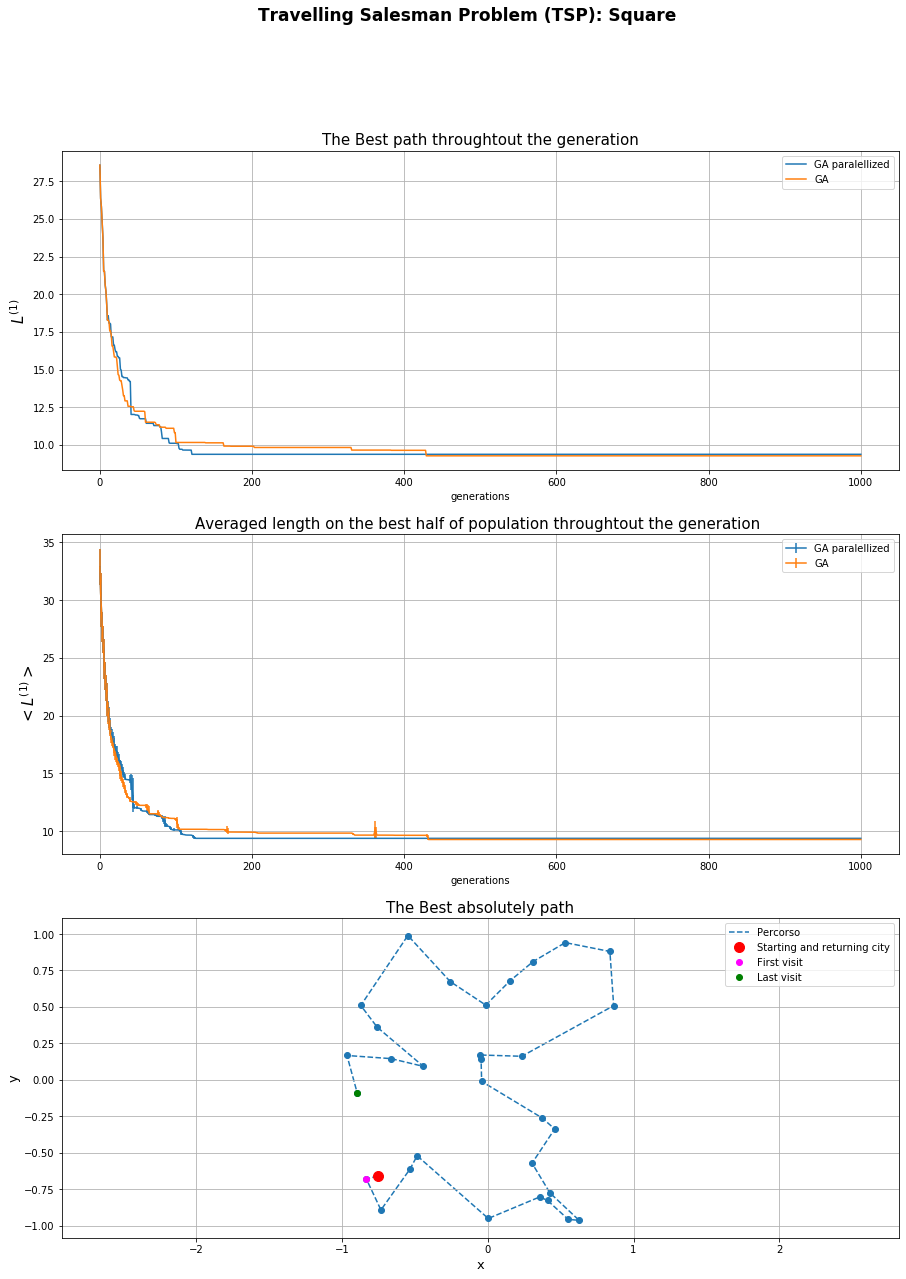

In [29]:
# parallellized, node with rank = 0
gen_par, L_best_par = np.loadtxt("Results/Best_Individual_Evolution_square_0.dat", usecols=(0,1), unpack='true')
gen_par, L_average_par , error_L_average_par = np.loadtxt("Results/Average_Individuals_Evolution_square_0.dat", usecols=(0,1,2), unpack='true')
x_best_par,y_best_par = np.loadtxt("Results/Best_Individual_square_0.dat", usecols=(1,2), unpack='true')

#not parallellized
gen, L_best = np.loadtxt("Results_GA/Best_Individual_Evolution_square.dat", usecols=(0,1), unpack='true')
gen, L_average , error_L_average = np.loadtxt("Results_GA/Average_Individuals_Evolution_square.dat", usecols=(0,1,2), unpack='true')
x_best,y_best = np.loadtxt("Results_GA/Best_Individual_square.dat", usecols=(1,2), unpack='true')

print ('32 cities randomly placed inside a square')
print('The Length of the best path: ', L_best_par[len(L_best_par)-1])
print('Averaged length on the best half of the last population: ', round(L_average_par[len(L_average_par)-1],8) , '+/-', round(error_L_average_par[len(error_L_average_par)-1],8))

fig=plt.figure(figsize=(15,20))
plt.suptitle("Travelling Salesman Problem (TSP): Square", fontsize='17', weight='bold')

plt.subplot(311)
plt.plot(gen_par, L_best_par, label = 'GA paralellized')
plt.plot(gen, L_best, label = 'GA')
plt.title("The Best path throughtout the generation", size = '15')
plt.xlabel('generations')
plt.ylabel('$L^{(1)}$',size = '15')
plt.grid(True)
plt.legend()


plt.subplot(312)
plt.errorbar(gen_par, L_average_par , yerr = error_L_average_par, label = 'GA paralellized')
plt.errorbar(gen, L_average , yerr = error_L_average, label = 'GA')
plt.title("Averaged length on the best half of population throughtout the generation ", size = '15')
plt.xlabel('generations')
plt.ylabel('$<L^{(1)}>$', size = '15')
plt.grid(True)
plt.legend()

plt.subplot(313)
plt.plot(x_best_par,y_best_par,zorder=1,label = 'Percorso',linestyle = '--') 
plt.scatter(x_best_par,y_best_par,zorder=2)
plt.scatter(x_best_par[0],y_best_par[0],s=100,label ='Starting and returning city',color = 'red', zorder = 2)
plt.scatter(x_best_par[1],y_best_par[1],label ='First visit',color = 'Magenta',zorder = 2)
plt.scatter(x_best_par[len(x_best_par)-1],y_best_par[len(y_best_par)-1],label ='Last visit',color = 'Green',zorder = 2)
plt.title('The Best absolutely path', size = '15')
plt.axis("equal")
plt.xlabel("x", fontsize = 13)
plt.ylabel("y", fontsize = 13)
plt.grid(True)
plt.legend()

plt.show()

- Dal confronto fra l'algoritmo genetico parallellizzato e non, si osserva che il **tempo computazionale**, ossia il numero di iterazioni, impiegato per raggiungere la **soluzione ottimale** (il minimo globale) del problema di ottimizzazione è decisamente inferiore per l'elaborazione su più processori che si realizza nel calcolo parallelo consentendo lo scambio di informazioni ogni 10 generazioni dell'algoritmo. Questo significa che le performances ottenute simulando simultaneamente "4 continenti" sono decisamente migliori, a rimarcare la potenza della tecnica del parallel computing.  
